# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [1]:
# Start coding here...
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from scipy.stats import yeojohnson
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, cross_val_predict, cross_validate,
RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, confusion_matrix, mean_squared_error, r2_score, recall_score,
roc_auc_score, roc_curve, mean_absolute_error, auc, precision_score, f1_score, classification_report)

from sklearn.ensemble import (AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier,
RandomForestClassifier, HistGradientBoostingClassifier)

## Load Data

In [2]:
# Load data 
df = pd.read_csv('recipe_site_traffic_2212.csv')

## Data Inspection

In [3]:
# Checking for duplicated values
df.duplicated(subset='recipe').sum()

0

There are no duplicated recipes so, no row removal is necessary. Our next step involves examining the dimensions of the dataset in terms of rows and columns, along with identifying column names and their respective data types. Additionally, we will assess the count of non-null values present in each column's dataframe. If any data type conversions are required or if there are missing values to address, we will take appropriate actions to rectify these concerns and to get the data ready for processing.

## Addressing missing - NaN values

In [4]:
# Knowing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
# Checking Null values
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [6]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [7]:
# Filling missing values of calories column 
df['calories'] = df['calories'].fillna(df['calories'].median())

# Filling missing values of carbohydrate column 
df['carbohydrate'] = df['carbohydrate'].fillna(df['carbohydrate'].median())

# Filling missing values of sugar column
df['sugar'] = df['sugar'].fillna(df['sugar'].median())

# Filling missing values of protein column
df['protein'] = df['protein'].fillna(df['protein'].median())

# Addressing high_traffic column 
df['high_traffic'] = np.where(df['high_traffic'] == 'High', True, False)

Given that the [high_traffic] column's data type is categorized as object, it is necessary to examine the distribution of values within this column. This assessment will guide us in determining the most suitable data type conversion for this column.

As the [high_traffic] column only contains a single value, namely [High], the interpretation is that null values in this column correspond to [Low] traffic. Knowing this context, we can convert the data type of this column to boolean,
so in this case True is equal to [High] traffic, while False is equal to [Low] traffic.

In [8]:
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [9]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,Pork,6,True
1,2,35.48,38.56,0.66,0.92,Potato,4,True
2,3,914.28,42.68,3.09,2.88,Breakfast,1,False
3,4,97.03,30.56,38.63,0.02,Beverages,4,True
4,5,27.05,1.85,0.80,0.53,Beverages,4,False


## Changing dtypes and normalizing string column

In [10]:
df['servings'].value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64

Considering that the servings column contains only integer values, we can proceed to convert its data type to integer. We can retain its numeric data type for now, as it will need to be converted back to integer format during both model development and evaluation phases.

In [11]:
# Replacing string values
df['servings'] = df['servings'].str.replace(' as a snack', '')

# Changing dtype of servings 
df['servings'] = df['servings'].astype('int')

In [12]:
df['servings'].value_counts()

servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

As you can see I had to fix the values and change the dtype of the servings column and now it's validated.

## Normalizing category column
Currently classified as an object type, we must need to evaluate any rows to facilitate the conversion into the category type. Addressing this issue I had to perform string manipulation, lowering the values and removing spaces between them so that we can validate the data all around.

In [13]:
df['category'].value_counts()

category
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: count, dtype: int64

In [14]:
# Lowering values in the category column
df['category'] = df['category'].str.lower() 

# Removing spaces in the category column
df['category'] = df['category'].str.replace('chicken breast', 'chicken_breast')
df['category'] = df['category'].str.replace('one dish meal', 'one_dish_meal')

# Changing dtype of the category column
df['category'] = df['category'].astype('category')

In [15]:
df['category'].value_counts()

category
breakfast         106
chicken_breast     98
beverages          92
lunch/snacks       89
potato             88
pork               84
dessert            83
vegetable          83
meat               79
chicken            74
one_dish_meal      71
Name: count, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      947 non-null    float64 
 2   carbohydrate  947 non-null    float64 
 3   sugar         947 non-null    float64 
 4   protein       947 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [17]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,288.55,21.48,4.55,10.80,pork,6,True
1,2,35.48,38.56,0.66,0.92,potato,4,True
2,3,914.28,42.68,3.09,2.88,breakfast,1,False
3,4,97.03,30.56,38.63,0.02,beverages,4,True
4,5,27.05,1.85,0.80,0.53,beverages,4,False


With the completion of data validation and cleaning process, the dataframe is now prepared for exploratory analysis. Moving forward, we can compute descriptive statistics for each numerical column within the dataframe. This process will provide valuable insights into the characteristics of the data and how it is distrubuted.

## Exploratory Data Analisys

In [18]:
df.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,947.000000,947.000000,947.000000,947.000000,947.000000,947.000000
mean,474.000000,427.846019,34.323464,8.799641,23.416283,3.477297
std,273.519652,441.673556,42.836191,14.306785,35.486699,1.732741
min,1.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,114.410000,9.135000,1.795000,3.465000,2.000000
50%,474.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,710.500000,576.225000,42.590000,9.285000,28.530000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


Analyzing the descriptive statistics, it's evident that there is a high-notable standard deviation, particularly in columns related to calories, carbohydrate and protein. Additionally, the quantile values indicate the presence of outliers, contributing to skewness in the distribution. As a result, we can derive that the value distribution is non-normal, underscoring that the median is a more representative measure for these columns.

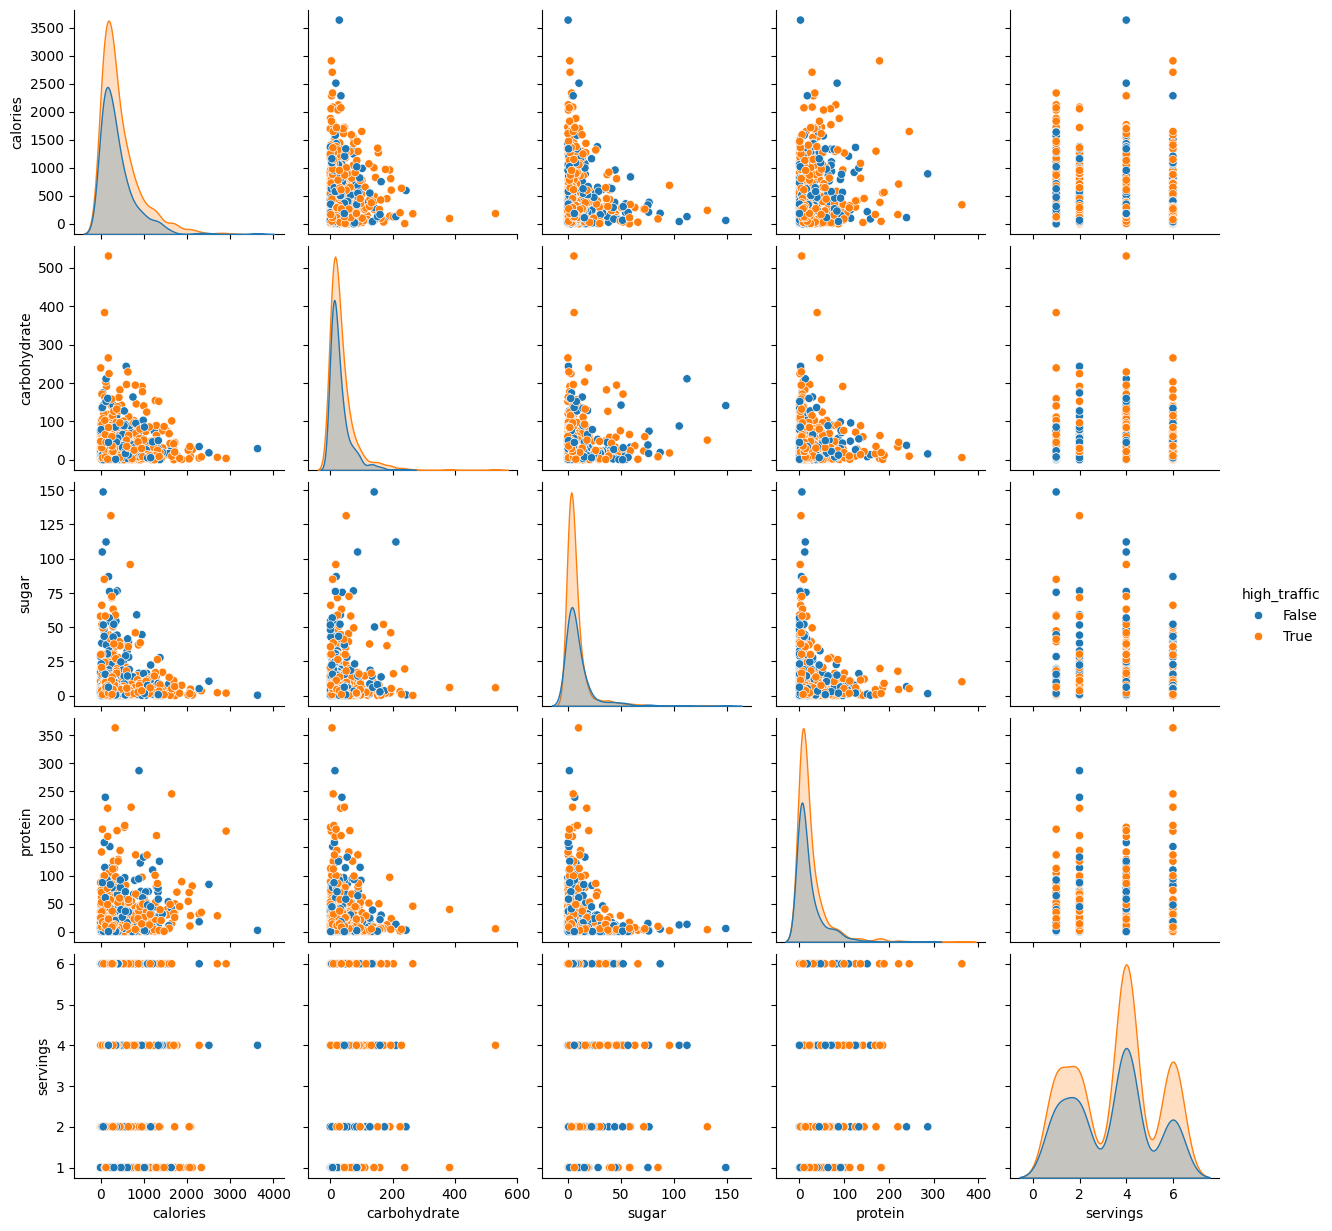

In [19]:
cols_to_plot = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(df[cols_to_plot], hue='high_traffic')
plt.show()

Based on the plot, it is evident that there is not a significant correlation between these columns, so that beind said our next step is to proceed and generate some visualization plots to plot the distribution of calories within the recipes.

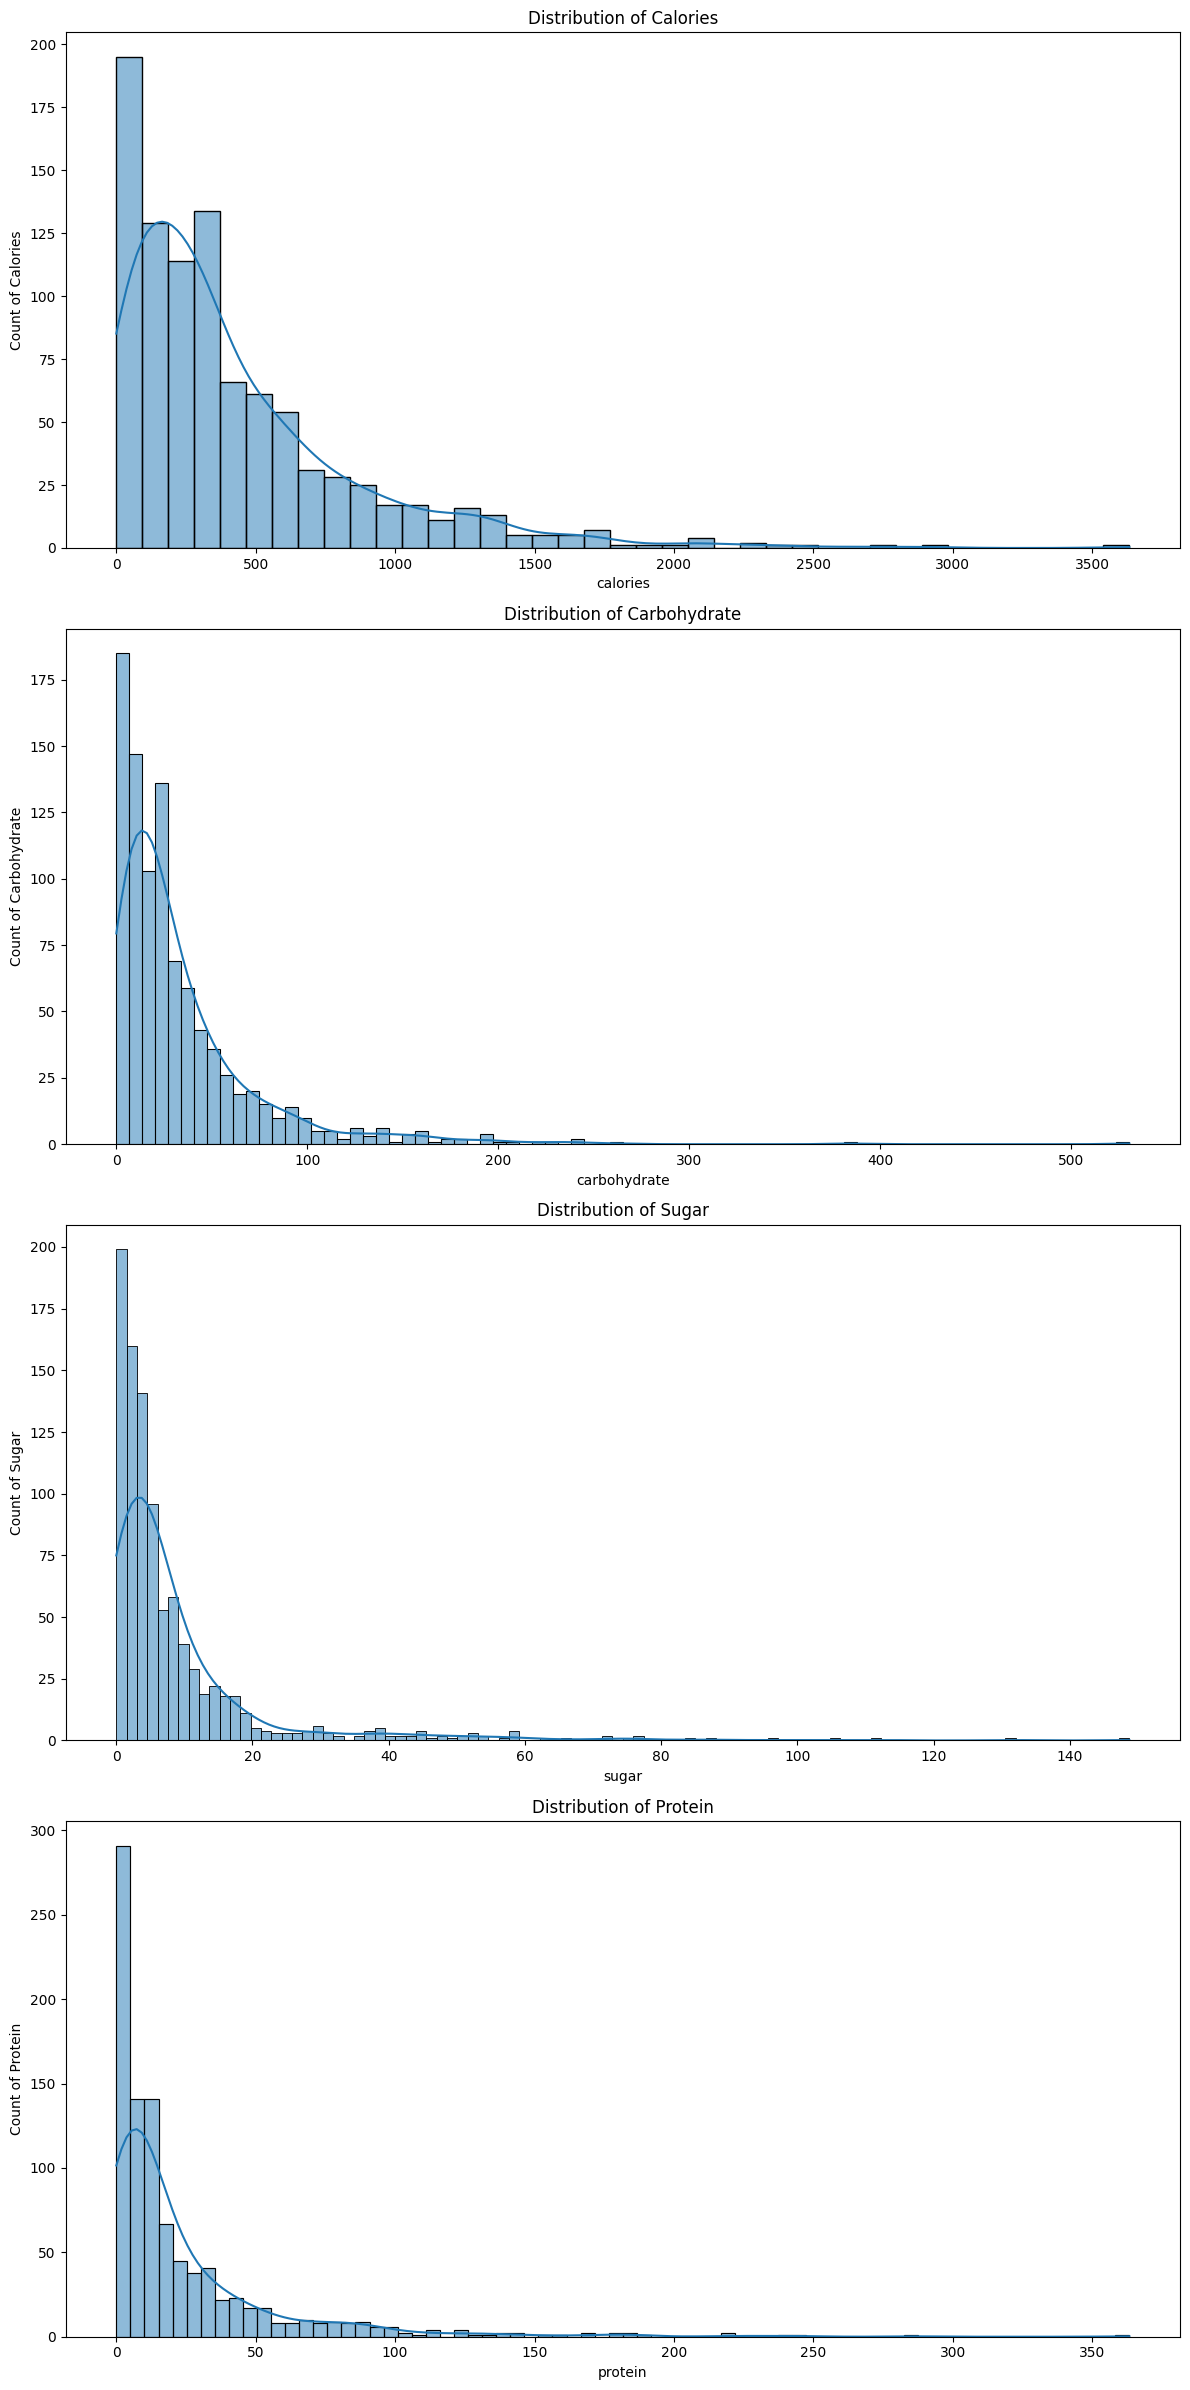

In [20]:
# Specifying the numerical columns to plot
numeric_columns =  df.select_dtypes(include='float').columns

# Creating subplots with the desired number of rows and columns
num_rows = len(numeric_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

# Iterating over the numerical columns and plot the distributions
for i, column in enumerate(numeric_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")
    ax.set_ylabel(f"Count of {column.capitalize()}")

# Adjusting the spacing between subplots
plt.tight_layout()
plt.show()

The Kernel Density Estimation (KDE) in the plots results is a smooth curve that illustrates the underlying data distribution and in this case it's showing a right-skewed data distribution.

Upon observation, it becomes evident that the dataset predominantly consists of lower values concerning the calorie and nutritional components columns of foods or beverages.
These histograms validate our earlier affirmation regarding skewness.
To further illustrate the distribution, let's proceed to present it using box plots.

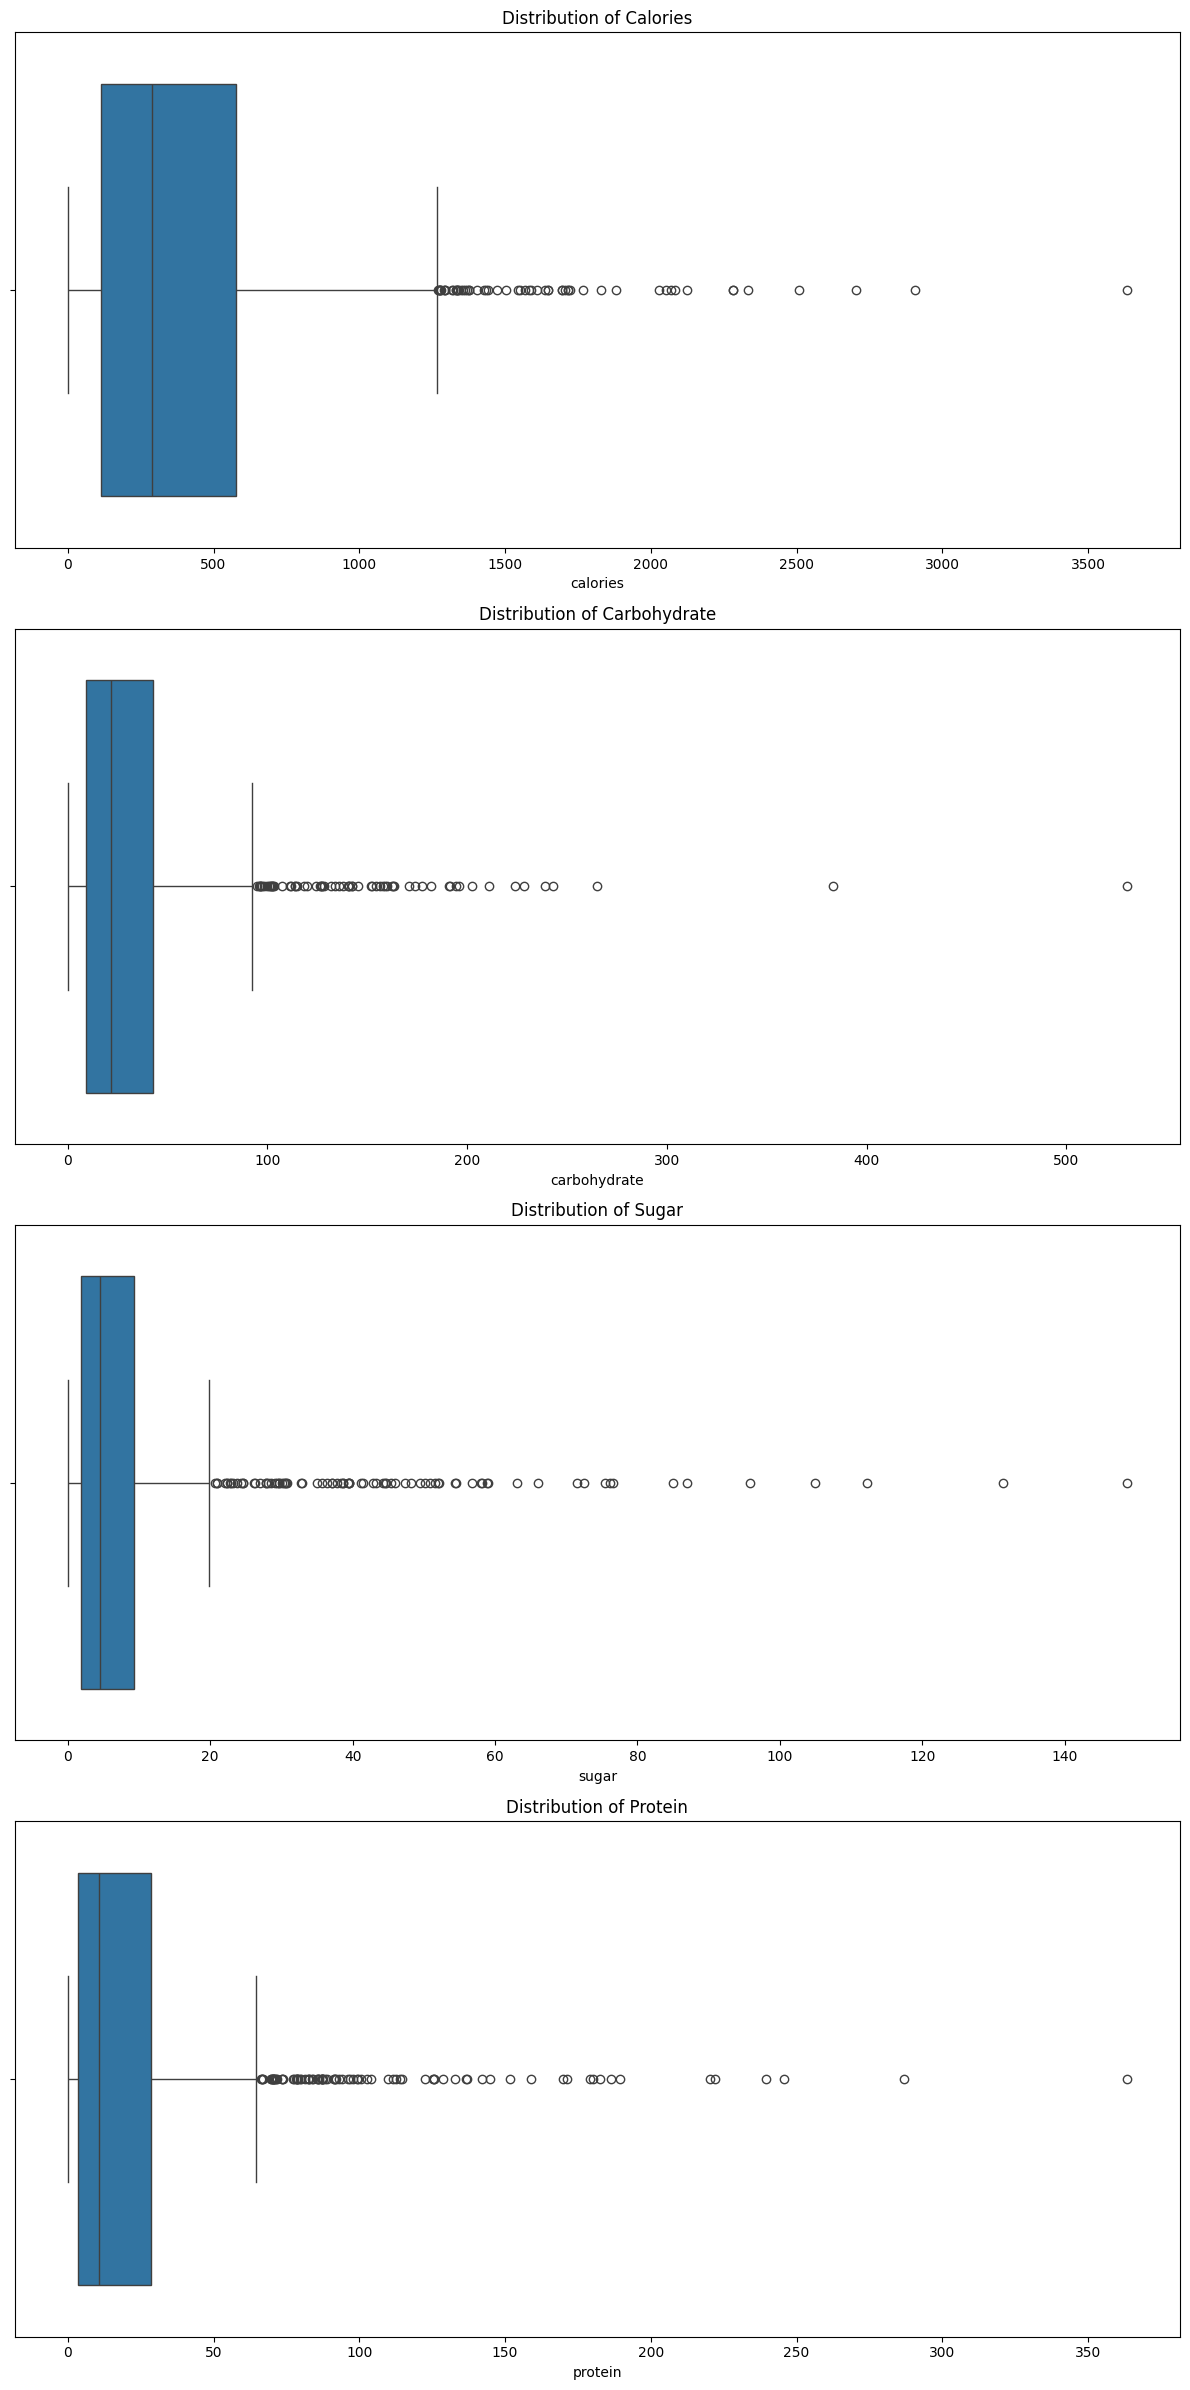

In [21]:
# Specifying the numerical columns to plot
numeric_columns_box =  df.select_dtypes(include='float').columns

# Creating subplots with the desired number of rows and columns
num_rows = len(numeric_columns_box)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

# Iterating over the numerical columns and plot the distributions
for i, column in enumerate(numeric_columns_box):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

# Adjusting the spacing between subplots
plt.tight_layout()
plt.show()

Once again, the plots above affirm the existence of outliers, the right-skewed nature of these columns, and the importance of employing the median method for analysis.

Moreover, we can dig into the median values of calories and nutritional components based on the category. We can achieve this by grouping the data according to the category and then calculating the median aggregation.

          category  calories  carbohydrate   sugar  protein
0        beverages   126.455        11.250   8.075    0.410
1        breakfast   229.380        28.420   4.830   11.685
2          chicken   367.895        19.045   4.090   23.740
3   chicken_breast   355.585        13.875   4.035   33.010
4          dessert   288.550        33.940  20.990    5.080
5     lunch/snacks   343.260        29.100   3.380   10.850
6             meat   410.920        20.960   4.340   25.210
7    one_dish_meal   374.750        24.890   4.160   25.730
8             pork   308.500        21.480   4.550   22.905
9           potato   288.550        31.115   2.935    6.420
10       vegetable   138.640        16.880   4.160    5.370


<Figure size 640x480 with 0 Axes>

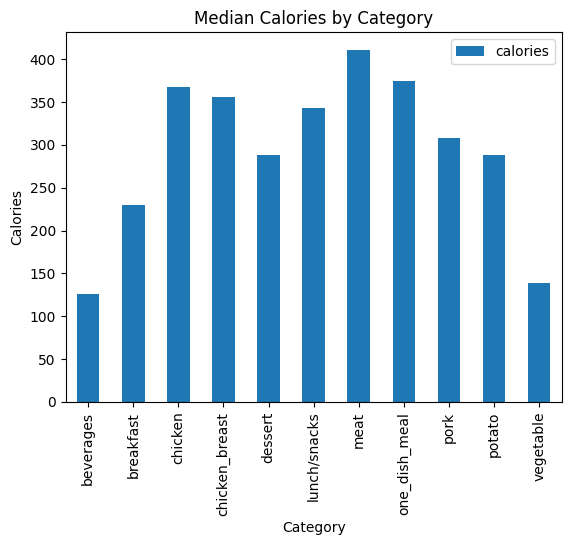

<Figure size 640x480 with 0 Axes>

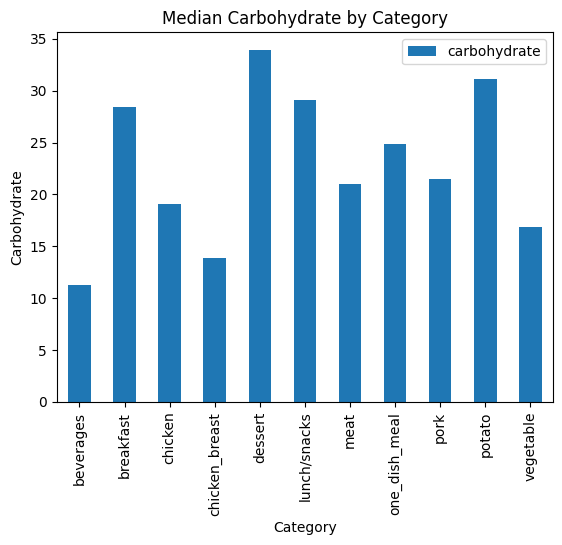

<Figure size 640x480 with 0 Axes>

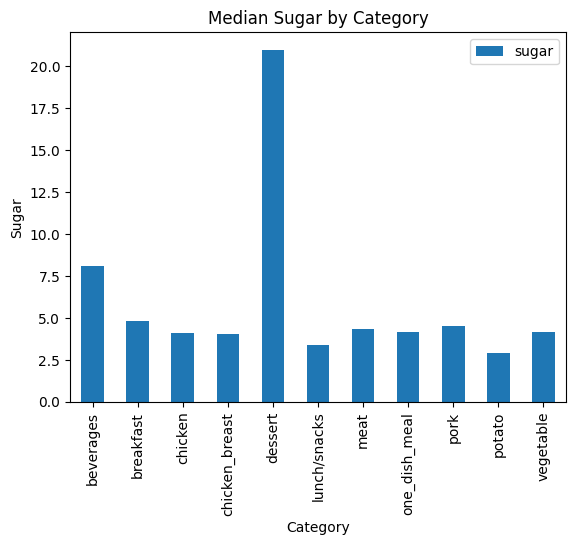

<Figure size 640x480 with 0 Axes>

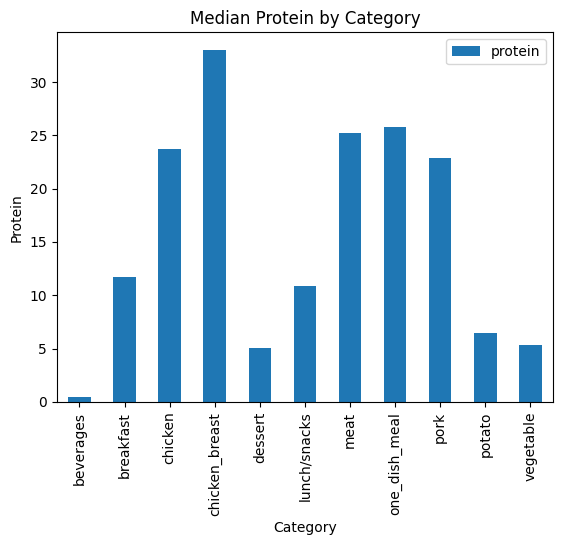

In [22]:
# Group by category column and find the total number of servings
category_median = df.groupby("category",observed=False)[numeric_columns].median().reset_index()
print(category_median)

for column in numeric_columns:
    # Create a bar plot
    plt.figure()
    category_median.plot(x="category", y=column, kind="bar")
    
    # Set x and y axis labels
    plt.xlabel("Category")
    plt.ylabel(f"{column.capitalize()}")
    plt.title(f"Median {column.capitalize()} by Category")

# Rotate axis xticks
plt.xticks(rotation=90)
plt.show()

We observe that the medians for calories and nutritional components are not symmetrical as anticipated, varying depending on the type of food and beverages.

Moving forward, let's begin by examining the relationship between servings and high traffic status.

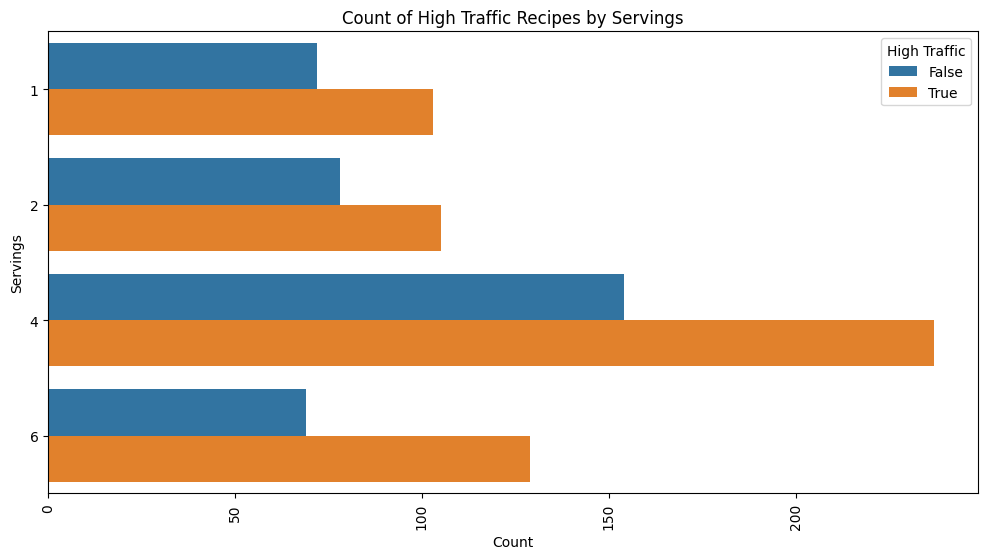

In [23]:
# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y="servings", hue="high_traffic", data=df)

# Set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Servings")

# Set title
plt.title("Count of High Traffic Recipes by Servings")

# Set x axis ticks
plt.xticks(rotation=90)

# Set legend title
plt.legend(title="High Traffic")
plt.show()

In [24]:
# Group by high_trafic to show how total number of servings is distributed
high_traffic_servings = pd.pivot_table(df, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(f'Original high traffic servings \n\n {high_traffic_servings}\n')
print(f'Normalized high traffic servings \n\n {high_traffic_servings_normalized}')

Original high traffic servings 

 high_traffic  False  True 
servings                  
1                72    103
2                78    105
4               154    237
6                69    129

Normalized high traffic servings 

 high_traffic     False     True 
servings                        
1             0.411429  0.588571
2             0.426230  0.573770
4             0.393862  0.606138
6             0.348485  0.651515


Both the plot and the normalized values illustrate that recipes with 4 and 6 servings exhibit a higher rate of high traffic.

That beind said, we will proceed to examine the relationship between categories and high traffic status.

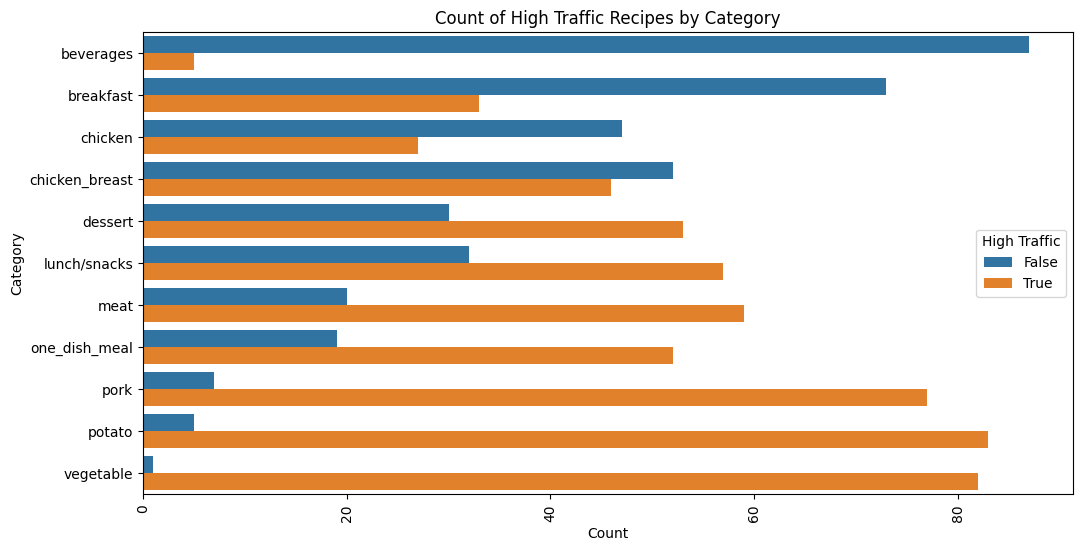

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(y="category", hue="high_traffic", data=df)

# Set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Category")

# Set title
plt.title("Count of High Traffic Recipes by Category")

# Set x axis ticks
plt.xticks(rotation=90)

# Set legend title
plt.legend(title="High Traffic")
plt.show()

In [26]:
# Create pivot table for aggregation
high_traffic_category = df.pivot_table(index="category", columns="high_traffic", 
                                       values="servings", aggfunc="sum",
                                       observed=False).sort_values(by='category', ascending=False)
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

# Show the result
print(f'Original high traffic category \n\n {high_traffic_category}\n')
print(f'Normalized high traffic category \n\n {normalized_table}')

Original high traffic category 

 high_traffic    False  True 
category                    
vegetable           4    297
potato             13    316
pork               23    293
one_dish_meal      53    168
meat               74    198
lunch/snacks      120    197
dessert           103    190
chicken_breast    183    159
chicken           155     91
breakfast         233    107
beverages         297     19

Normalized high traffic category 

 high_traffic       False     True 
category                          
vegetable       0.013289  0.986711
potato          0.039514  0.960486
pork            0.072785  0.927215
one_dish_meal   0.239819  0.760181
meat            0.272059  0.727941
lunch/snacks    0.378549  0.621451
dessert         0.351536  0.648464
chicken_breast  0.535088  0.464912
chicken         0.630081  0.369919
breakfast       0.685294  0.314706
beverages       0.939873  0.060127


Watching this output, we can derive that showcasing recipes in certain categories leads to increased traffic.
The top three categories in terms of high traffic are [Vegetable, Potato, and Pork], on the other hand, the [Beverages] category appears to have the lowest traffic impact.

## Addressing outliers
To address this problem it involves leveraging binary classification algorithms from the realm of supervised machine learning. We have the option to select an appropriate classification model to predict the high traffic status. Viable choices include Logistic Regression, Decision Tree, Random Forest, Support Vector Machines, ect. For our baseline model, we will opt for Logistic Regression, and the others will be considered for comparison.

Before proceeding with Logistic Regression, let's tackle the issue of outliers within our dataset.

To achieve this, we'll compute the Interquartile Range (IQR) for each column and subsequently determine the upper and lower boundaries to manage the outliers more effectively.

In [27]:
# Function to calculate upper and lower boundaries
def remove_outlier_limits(data, factor=1.5):
    
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit

# Select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = remove_outlier_limits(df[column])
    outlier_limits[column] = (lower_limit, upper_limit)

# Check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: -578.3125000000001
Upper Limit: 1268.9475000000002
--------------------------------
Column: carbohydrate
Lower Limit: -41.04750000000001
Upper Limit: 92.77250000000001
--------------------------------
Column: sugar
Lower Limit: -9.44
Upper Limit: 20.52
--------------------------------
Column: protein
Lower Limit: -34.13250000000001
Upper Limit: 66.1275
--------------------------------


As anticipated, there are no concerns with respect to low values; however, certain high values require attention. Various techniques are available to address this issue. Upon evaluation, it is apparent that outright removal of outliers leads to significant data loss, making this approach less favorable.

Similarly, capping outliers or using winsorization does not yield the desired distribution.

In [28]:
# Specify the numerical columns to plot
numerical_columns =  df.select_dtypes(include='float').columns

# Filter the dataset based on the outlier limits
transformed_data = df.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    transformed_data[column] = yeojohnson(transformed_data[column])[0] # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,12.416266,3.651219,1.445558,2.489758,pork,6,True
1,2,5.807194,4.444895,0.481424,0.653832,potato,4,True
2,3,17.850870,4.588695,1.223738,1.362354,breakfast,1,False
3,4,8.541219,4.122245,2.585342,0.019804,beverages,4,True
4,5,5.186333,1.104103,0.553815,0.425908,beverages,4,False


Through experimentation with diverse transformation methods including Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation, it has been determined that the Yeo-Johnson Transformation is the most effective approach.

Note that a few columns contain 0 values. While the Box-Cox Transformation could be used after replacing these 0 values with a very small value (e.g., 0.00001), such replacement might introduce bias. Therefore, the Yeo-Johnson method has been preferred in this case.

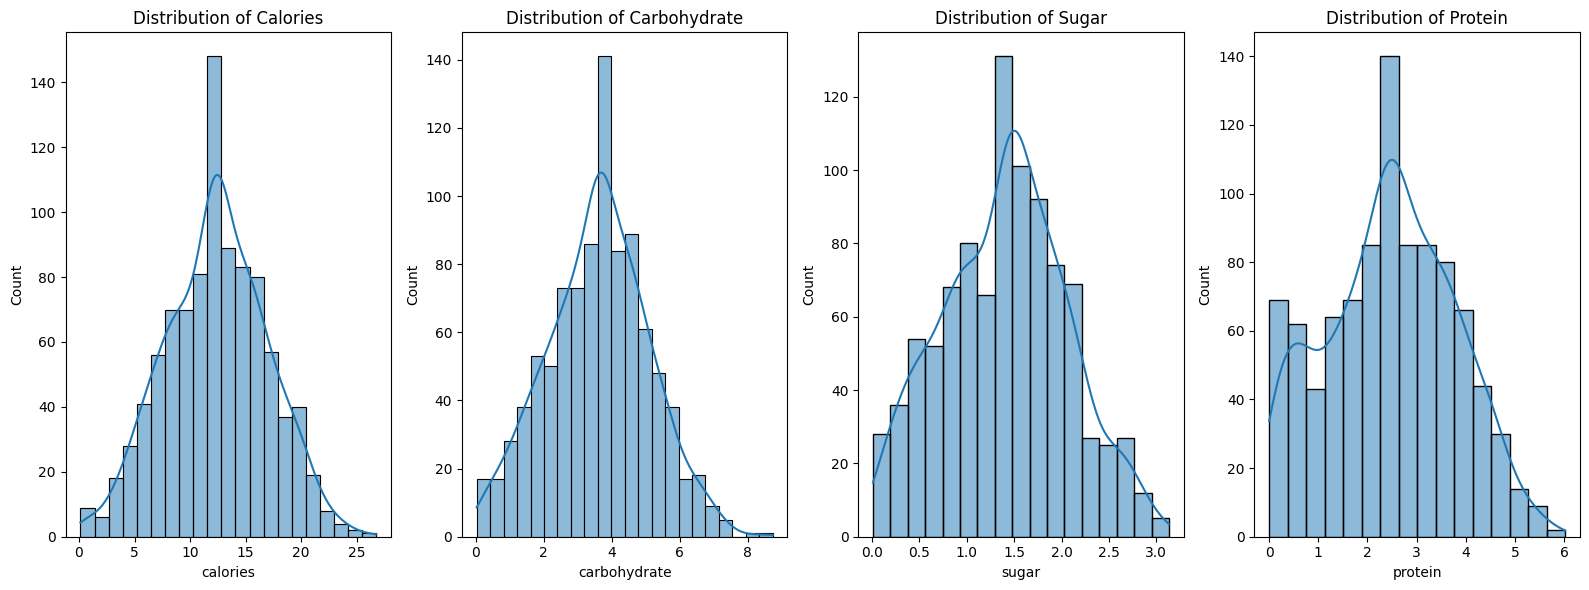

In [29]:
plt.figure(figsize=(16, 6))

# Iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [30]:
# Performing one-hot encoding using pd.get_dummies on the category column
encoded_cat = pd.get_dummies(df['category'], dtype='int')

# Concatenate the encoded categories with the transformed_data dataframe
df_encoded = pd.concat([transformed_data, encoded_cat], axis=1)

# Drop the original category column
df_encoded = df_encoded.drop("category", axis=1)
df_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,beverages,breakfast,chicken,chicken_breast,dessert,lunch/snacks,meat,one_dish_meal,pork,potato,vegetable
0,1,12.416266,3.651219,1.445558,2.489758,6,True,0,0,0,0,0,0,0,0,1,0,0
1,2,5.807194,4.444895,0.481424,0.653832,4,True,0,0,0,0,0,0,0,0,0,1,0
2,3,17.850870,4.588695,1.223738,1.362354,1,False,0,1,0,0,0,0,0,0,0,0,0
3,4,8.541219,4.122245,2.585342,0.019804,4,True,1,0,0,0,0,0,0,0,0,0,0
4,5,5.186333,1.104103,0.553815,0.425908,4,False,1,0,0,0,0,0,0,0,0,0,0


## ML models and Comparisons
Now, we will proceed as follow:

Split the data into features (X) and the target variable (y), where the target variable is the [high_traffic] column. Adittionaly divide the data into training and testing sets using the [train_test_split] function from the scikit-learn library.

Develop both the baseline model and comparison models. Fit the chosen model on the training data and employ it to predict the outcomes on the testing data.
Additionally, we can utilize the predict method on the trained model to assess the potential of overfitting. With this in mind, let's proceed to create the baseline and comparison machine learning models.

In [31]:
# # Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['high_traffic'], axis=1)
y = df_encoded['high_traffic']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [32]:
# Create function to fit the model, make prediction, and return evaluation metrics
def model_function(model, X_train, y_train, X_test, y_test):
    metrics = {}

    # Fit the model
    model.fit(X_train, y_train)

    # Predict the train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    # Find evaluation metrics parameters for train data
    accuracy_train = accuracy_score(y_train, model_pred_train)
    precision_train = precision_score(y_train, model_pred_train, zero_division=0)
    recall_train = recall_score(y_train, model_pred_train, zero_division=0)
    f1_train = f1_score(y_train, model_pred_train)
    cm_train = confusion_matrix(y_train, model_pred_train)
    metrics['train'] = [accuracy_train, precision_train, recall_train, f1_train, cm_train]

    # Find evaluation metrics parameters for test data
    accuracy_test = accuracy_score(y_test, model_pred_test)
    precision_test = precision_score(y_test, model_pred_test, zero_division=0)
    recall_test = recall_score(y_test, model_pred_test, zero_division=0)
    f1_test = f1_score(y_test, model_pred_test)
    cm_test = confusion_matrix(y_test, model_pred_test)
    metrics['test'] = [accuracy_test, precision_test, recall_test, f1_test, cm_test] 

    return metrics

In [34]:
# LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg_evaluation_metrics = model_function(logreg, X_train, y_train, X_test, y_test)

### Comparison models ###

# DecisionTree
dtree = DecisionTreeClassifier()
dtree_evaluation_metrics = model_function(dtree, X_train, y_train, X_test, y_test)

# RandomForest
rf = RandomForestClassifier()
rf_evaluation_metrics = model_function(rf, X_train, y_train, X_test, y_test)

# SupportVectorMachines
svm = SVC()
svm_evaluation_metrics = model_function(svm, X_train, y_train, X_test, y_test)

# AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost_evaluation_metrics = model_function(adaboost, X_train, y_train, X_test, y_test)

# BaggingClassifier
bagging = BaggingClassifier()
bagging_evaluation_metrics = model_function(bagging, X_train, y_train, X_test, y_test)

# GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()
gradient_evaluation_metrics = model_function(gradient_boost, X_train, y_train, X_test, y_test)

# HistGradientBoostingClassifier 
histgradient = HistGradientBoostingClassifier()
histgradient_evaluation_metrics = model_function(histgradient, X_train, y_train, X_test, y_test)

# XGBClassifier
xgboost = XGBClassifier()
xgboost_evaluation_metrics = model_function(xgboost, X_train, y_train, X_test, y_test)

# Ridge 
ridge = RidgeClassifier()
ridge_evaluation_metrics = model_function(ridge, X_train, y_train, X_test, y_test)

In [35]:
def print_metrics(metrics):
    print(" Accuracy:", metrics[0])
    print(" Precision:", metrics[1])
    print(" Recall:", metrics[2])
    print(" F1-Score:", metrics[3])
    print("  Confusion Matrix:")
    print(metrics[4])
    print()

In [36]:
# Print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics['train'])

print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics['test'])

Logistic Regression Train:
 Accuracy: 0.760898282694848
 Precision: 0.7823408624229979
 Recall: 0.8355263157894737
 F1-Score: 0.8080593849416755
  Confusion Matrix:
[[195 106]
 [ 75 381]]

Logistic Regression Test:
 Accuracy: 0.7631578947368421
 Precision: 0.8067226890756303
 Recall: 0.8135593220338984
 F1-Score: 0.810126582278481
  Confusion Matrix:
[[49 23]
 [22 96]]



The evaluation of the Logistic Regression model reveals a marginal difference between test and train results. The slight elevation of test results in comparison to train results implies the presence of limited data for model development.

Moreover, there are some models with indication of overfitting.

Given that the objective is to achieve an 80% accuracy in predicting high traffic recipes, it's essential to examine the precision metrics, which stands at 77.77%. This precision score does not align with the goal of correctly predicting high traffic recipes 80% of the time.

In [37]:
# Print the evaluation metrics and confusion matrices for Decision Tree
print("Decision Tree Train:")
print_metrics(dtree_evaluation_metrics['train'])

print("Decision Tree Test:")
print_metrics(dtree_evaluation_metrics['test'])

Decision Tree Train:
 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0
 F1-Score: 1.0
  Confusion Matrix:
[[301   0]
 [  0 456]]

Decision Tree Test:
 Accuracy: 0.6894736842105263
 Precision: 0.7706422018348624
 Recall: 0.711864406779661
 F1-Score: 0.7400881057268722
  Confusion Matrix:
[[47 25]
 [34 84]]



The Decision Tree model, being robust in nature, has demonstrated an instance of overfitting due to the low number of observations within the dataset. This overfitting indicates that the model has essentially memorized the training data, rendering it unsuitable for our specific dataset.

It's important to note that various techniques, including strategies like increasing training data, regularization, and cross-validation, can be employed to address overfitting. However, considering the limited data available, these techniques may not yield the desired outcome.

With these considerations, the Decision Tree model may not be the best fit for our dataset due to its overfitting tendencies.

In [38]:
# Print the evaluation metrics and confusion matrices for Random Forest
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics['train'])

print("Random Forest Test:")
print_metrics(rf_evaluation_metrics['test'])

Random Forest Train:
 Accuracy: 1.0
 Precision: 1.0
 Recall: 1.0
 F1-Score: 1.0
  Confusion Matrix:
[[301   0]
 [  0 456]]

Random Forest Test:
 Accuracy: 0.7526315789473684
 Precision: 0.7795275590551181
 Recall: 0.8389830508474576
 F1-Score: 0.8081632653061225
  Confusion Matrix:
[[44 28]
 [19 99]]



Similar to the Decision Tree model, the Random Forest model, being a robust algorithm, also exhibits characteristics of overfitting.
This is consistent with the explanation provided earlier for the Decision Tree model. The precision score hit 75.59%, and it is not convinient to use because of the presence of overfitting and for that reason the Random Forest model is unsuitable for use.

In [39]:
# Print the evaluation metrics and confusion matrices for Support Vector Machine
print("Support Vector Machine Train:")
print_metrics(svm_evaluation_metrics['train'])

print("Support Vector Machine Test:")
print_metrics(svm_evaluation_metrics['test'])

Support Vector Machine Train:
 Accuracy: 0.6023778071334214
 Precision: 0.6023778071334214
 Recall: 1.0
 F1-Score: 0.7518549051937345
  Confusion Matrix:
[[  0 301]
 [  0 456]]

Support Vector Machine Test:
 Accuracy: 0.6210526315789474
 Precision: 0.6210526315789474
 Recall: 1.0
 F1-Score: 0.7662337662337663
  Confusion Matrix:
[[  0  72]
 [  0 118]]



The Support Vector Machines (SVM) model, we encounter underfitting. This arises due to the model's inability to effectively learn from the limited training data available. The recall value being equal to 1 is indicative of the model consistently predicting 0 for all cases.

We can establish a Key Performance Indicator (KPI) by dividing True Positives (high recipes correctly classified as high) by False Positives (low recipes mistakenly classified as high) within the confusion matrix. This KPI, which we can refer to as the "High Traffic Conversion Rate," needs to be maintained at a level equal to or greater than 4.0, relying on the train and test results of our baseline model. This KPI can serve as a valuable metric for our business model, providing insights into the accuracy of high traffic predictions.

In [40]:
# Print the evaluation metrics and confusion matrices for Adaboost
print("Adaboost Train:") 
print_metrics(adaboost_evaluation_metrics['train'])

print("Adaboost Test:")
print_metrics(adaboost_evaluation_metrics['test'])

Adaboost Train:
 Accuracy: 0.7661822985468957
 Precision: 0.7708737864077669
 Recall: 0.8706140350877193
 F1-Score: 0.8177136972193615
  Confusion Matrix:
[[183 118]
 [ 59 397]]

Adaboost Test:
 Accuracy: 0.7157894736842105
 Precision: 0.7461538461538462
 Recall: 0.8220338983050848
 F1-Score: 0.782258064516129
  Confusion Matrix:
[[39 33]
 [21 97]]



In [41]:
# Print the evaluation metrics and confusion matrices for BaggingClassifier
print("Bagging Train:")
print_metrics(bagging_evaluation_metrics['train']) 

print("Bagging Test:")
print_metrics(bagging_evaluation_metrics['test'])

Bagging Train:
 Accuracy: 0.9815059445178336
 Precision: 0.9889380530973452
 Recall: 0.9802631578947368
 F1-Score: 0.9845814977973568
  Confusion Matrix:
[[296   5]
 [  9 447]]

Bagging Test:
 Accuracy: 0.7315789473684211
 Precision: 0.768
 Recall: 0.8135593220338984
 F1-Score: 0.7901234567901234
  Confusion Matrix:
[[43 29]
 [22 96]]



In [42]:
# Print the evaluation metrics and confusion matrices for GradientBoostingClassifier
print("Gradient Train:")
print_metrics(gradient_evaluation_metrics['train'])

print("Gradient Test:")
print_metrics(gradient_evaluation_metrics['test'])

Gradient Train:
 Accuracy: 0.8599735799207398
 Precision: 0.8528225806451613
 Recall: 0.9276315789473685
 F1-Score: 0.8886554621848739
  Confusion Matrix:
[[228  73]
 [ 33 423]]

Gradient Test:
 Accuracy: 0.7473684210526316
 Precision: 0.7651515151515151
 Recall: 0.8559322033898306
 F1-Score: 0.808
  Confusion Matrix:
[[ 41  31]
 [ 17 101]]



In [43]:
# Print the evaluation metrics and confusion matrices for RidgeClassifier
print("Ridge Train:")
print_metrics(ridge_evaluation_metrics['train'])

print("Ridge Test:")
print_metrics(ridge_evaluation_metrics['test'])

Ridge Train:
 Accuracy: 0.7648612945838837
 Precision: 0.7982832618025751
 Recall: 0.8157894736842105
 F1-Score: 0.806941431670282
  Confusion Matrix:
[[207  94]
 [ 84 372]]

Ridge Test:
 Accuracy: 0.7578947368421053
 Precision: 0.8050847457627118
 Recall: 0.8050847457627118
 F1-Score: 0.8050847457627118
  Confusion Matrix:
[[49 23]
 [23 95]]



Given that the objective is to achieve an 80% accuracy in predicting high traffic recipes, the RidgeClassifier predicts an 80.50%. This precision score aligns with the goal of correctly predicting high traffic recipes 80% of the time so that being said we have found our best model to predict the 80% objective.

In [44]:
# Alternative: More concise version using a helper function
def safe_divide(numerator, denominator, default_msg="N/A (division by zero)"):
    """Safely divide two numbers, returning a message if denominator is zero."""
    return numerator / denominator if denominator != 0 else default_msg
    
# KPI calculation with zero division handling
def calculate_kpi_v2(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    
    train_rate = safe_divide(kpi_train[1][1], kpi_train[0][1])
    test_rate = safe_divide(kpi_test[1][1], kpi_test[0][1])
    
    print(f"High Traffic Conversion Rate for {model_name} train: {train_rate}")
    print(f"High Traffic Conversion Rate for {model_name} test: {test_rate}")

#KPI calculation for Logistic Regression
calculate_kpi_v2(ridge_evaluation_metrics, "Ridge Regresssion")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Logistic Regression
calculate_kpi_v2(logreg_evaluation_metrics, "Logistic Regresssion")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Decision Tree
calculate_kpi_v2(dtree_evaluation_metrics, "Decision Tree")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Random Forest
calculate_kpi_v2(rf_evaluation_metrics, "Random Forest")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Support Vector Machines
calculate_kpi_v2(svm_evaluation_metrics, "Support Vector Machines")
print("-----------------------------------------------------------------------------------")

High Traffic Conversion Rate for Ridge Regresssion train: 3.9574468085106385
High Traffic Conversion Rate for Ridge Regresssion test: 4.130434782608695
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Logistic Regresssion train: 3.5943396226415096
High Traffic Conversion Rate for Logistic Regresssion test: 4.173913043478261
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Decision Tree train: N/A (division by zero)
High Traffic Conversion Rate for Decision Tree test: 3.36
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Random Forest train: N/A (division by zero)
High Traffic Conversion Rate for Random Forest test: 3.5357142857142856
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Support Vector Machines train: 1.5149

In the training results of the Decision Tree and Random Forest models, the "KPI = N/A" occurs due to overfitting. Furthermore, the test results for these models fall short of meeting our predetermined KPI requirement.

In both the training and testing results of the SVM model, underfitting contributes to the non-fulfillment of our KPI requirement.

Ultimately, in our baseline Ridge Regression model, the training and testing results successfully adhere to our KPI requirement.

## Summary 📝
In summary, our endeavors encompassed the development and evaluation of multiple models to attain our objective. Among the array of models created, the Ridge regression model emerged as the most effective performer. This underscores that the Ridge Classifier model is the optimal choice for predicting high traffic recipes and achieving an 80% accuracy in this prediction.

Taking a business perspective into account, predicting a high-traffic recipe as low traffic is a more significant error than the opposite scenario. Therefore, our primary focus is on model precision, as an erroneous prediction of low traffic for a potentially high-traffic recipe can lead to substantial losses for the business.

Furthermore, we introduced a bespoke Key Performance Indicator (KPI) named "High Traffic Conversion Rate." Its value was derived from our baseline model outcomes. We then employed this KPI to facilitate comparisons among the developed models.

Through exploratory analysis, we unearthed specific recipe categories that consistently yield high or low traffic. Specifically, recipes categorized as ["Vegetable," "Potato," or "Pork"] tend to generate high traffic, making them recommended candidates for inclusion on the website. Conversely, recipes categorized as ["Beverages"] typically results in low traffic, suggesting they should not be featured on the platform.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation